# Error Correction Comparision Between pyMeasure and StatistiCAL
The purpose of this notebook is to check that uncorrect functions return the expected result. In addition to check  the results of applying functions in pyMeasure.Code.Analysis.SParameter with the application of corrections directly through StatistiCAL

Overview:
1. Start StatistiCAL
2. Select Help->Load Sample Problem with DUT
3. Press Calibrate
4. Select Results->Save Corrected DUT->Save as DUT.txt
5. Select Results->Save 12 Term Error Correction->Save as ErrorCoefficents.txt
6. Select Results->Save Solution Vector -> Solution_Plus.txt (Saves isolation and switch terms too)
7. Select Results->Save 4-port error box-> ErrorBox.s4p
7. Open and Plot corrected DUT using pyMeasure (this is an average I think DY202, DY2022, DY202 measured with Rnd noise,etc)
8. Open DY202 with pyMeasure, Open SolutionVector, Open ErrorCoefficents
9. Correct DY202 and store as s2p
10. Plot DUT, and Corrected DY202 using both methods 

In [1]:
import re,os
from pyMeasure import *

Importing Code.Utils.Names
Importing Code.DataHandlers.NISTModels
The module smithplot was not found,please put it on the python path
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.TouchstoneModels
The module smithplot was not found,please put it on the python path
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.RadiCALModels
Importing Code.DataHandlers.ZipModels
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.MUFModels
Importing Code.Analysis.SParameter
Importing Code.Analysis.Uncertainty
Importing Code.InstrumentControl.Instruments
Importing Code.InstrumentControl.Experiments
Importing Code.FrontEnds.AdvancedInterfaceFrame

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)



Importing Code.FrontEnds.ShellPanel
reading user preferences
Importing Code.FrontEnds.IEPanel
Importing Code.FrontEnds.MatplotlibWxPanel


In [2]:
JUPYTER_DIRECTORY=r'C:\Users\sandersa\PyCharmProjects\Jupyter-Notebooks'
TEST_DIRECTORY=os.path.join(JUPYTER_DIRECTORY,"Error_Correction_Comparison_Files")

In [3]:
corrected_DUT=S2PV1(os.path.join(TEST_DIRECTORY,"DUT.txt"))
uncorrected_DUTs=map(lambda x:S2PV1(os.path.join(TEST_DIRECTORY,x)),["DY202.txt","DY2022.txt",
                                        "DY202_measured with rnd.txt",
                                        "DY202_measured with rnd1.txt"])

<IPython.core.display.Javascript object>


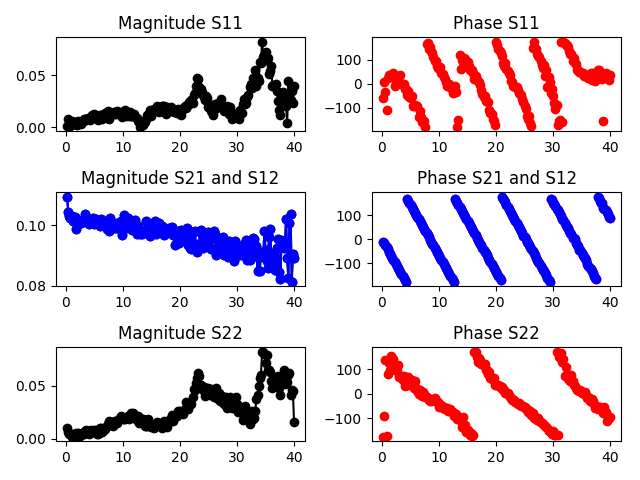

<IPython.core.display.Javascript object>


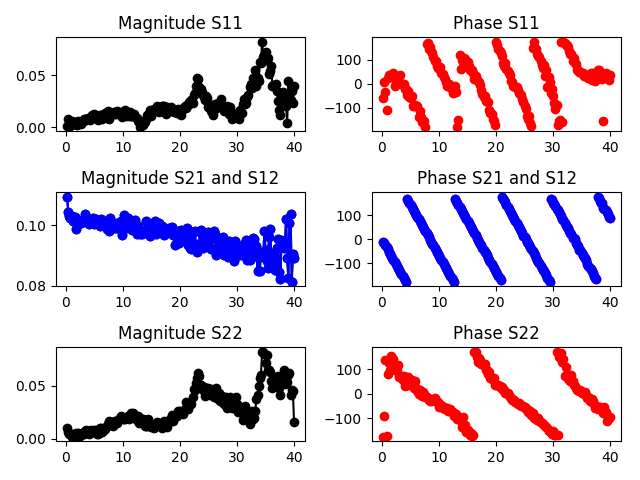

In [4]:
%matplotlib notebook
corrected_DUT.show();

In [6]:
# open the correction files
twelve_term=TwelveTermErrorModel(os.path.join(TEST_DIRECTORY,"CalCoefficients.txt"))
solution_vector=StatistiCALSolutionModel(os.path.join(TEST_DIRECTORY,"Solution_Plus.txt"))
switch_terms=S2PV1(os.path.join(TEST_DIRECTORY,"SwitchTerms.txt"))
four_port=SNP(os.path.join(TEST_DIRECTORY,"ErrorBox.s4p"))

In [7]:
switch_corrected_DUTS=map(lambda x: x.correct_switch_terms(switch_terms.sparameter_complex),uncorrected_DUTs)

In [9]:
pyMeasure_corrected_complex=map(lambda x:correct_sparameters_twelve_term(x.sparameter_complex,
                                                                      twelve_term.complex_data),
                                uncorrected_DUTs)
pyMeasure_eight_term_complex=map(lambda x:correct_sparameters_eight_term(x.sparameter_complex,
                                                                      solution_vector.eight_term_correction),
                                 uncorrected_DUTs)
pyMeasure_sixteen_term_complex=map(lambda x:correct_sparameters_sixteen_term(x.sparameter_complex,
                                                                   four_port.sparameter_complex),
                                   uncorrected_DUTs)
switch_corrected_DUTS=[]
for dut in uncorrected_DUTs:
    dut.correct_switch_terms(switch_terms.sparameter_complex)
    switch_corrected_DUTS.append(dut)
pyMeasure_eight_term_complex_sw=map(lambda x:correct_sparameters_eight_term(x.corrected_data,
                                                                      solution_vector.eight_term_correction),
                                    switch_corrected_DUTS)

In [10]:
pyMeasure_corrected_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),pyMeasure_corrected_complex)
pyMeasure_eight_term_corrected_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),
                                        pyMeasure_eight_term_complex)
pyMeasure_eight_term_corrected_DUTS_sw=map(lambda x:S2PV1(None,sparameter_complex=x),
                                           pyMeasure_eight_term_complex_sw)
pyMeasure_sixteen_term_corrected_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),
                                          pyMeasure_sixteen_term_complex)

In [23]:
pyMeasure_uncorrected_complex=map(lambda x:uncorrect_sparameters_twelve_term(x.sparameter_complex,
                                                                      twelve_term.complex_data),
                                pyMeasure_corrected_DUTS)
pyMeasure_un_eight_term_complex=map(lambda x:uncorrect_sparameters_eight_term(x.sparameter_complex,
                                                                      solution_vector.eight_term_correction),
                                 pyMeasure_eight_term_corrected_DUTS)
pyMeasure_un_sixteen_term_complex=map(lambda x:uncorrect_sparameters_sixteen_term(x.sparameter_complex,
                                                                   four_port.sparameter_complex),
                                   pyMeasure_sixteen_term_corrected_DUTS)
pyMeasure_uncorrected_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),pyMeasure_uncorrected_complex)
pyMeasure_un_eight_term_corrected_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),
                                        pyMeasure_un_eight_term_complex)

pyMeasure_un_sixteen_term_corrected_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),
                                          pyMeasure_un_sixteen_term_complex)

<IPython.core.display.Javascript object>


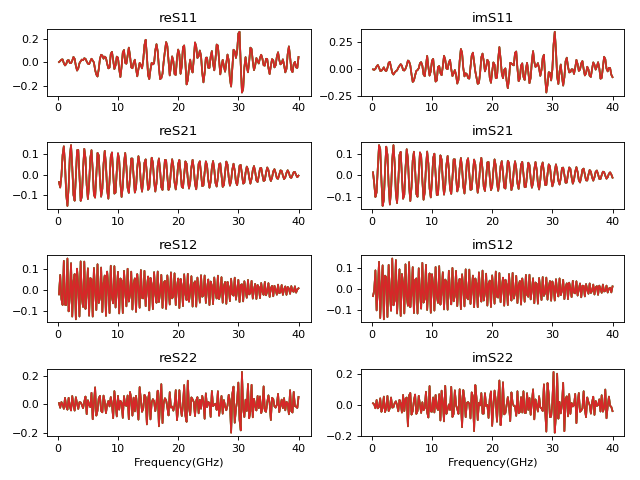

In [30]:
compare_s2p_plots(uncorrected_DUTs[0:2]+pyMeasure_un_sixteen_term_corrected_DUTS[0:2],
                  display_legend=False,format="ri");

<IPython.core.display.Javascript object>


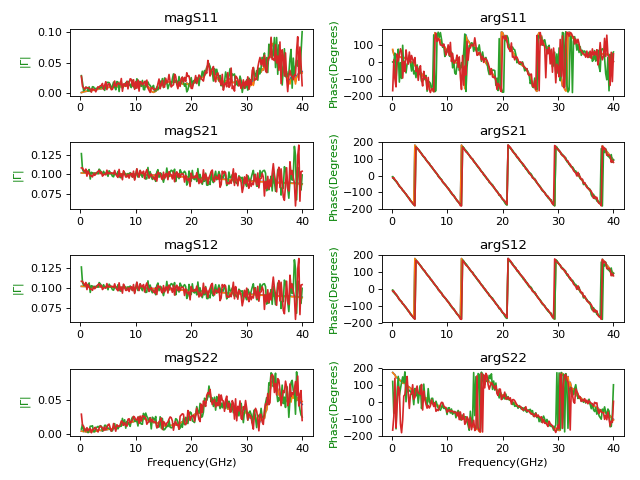

In [12]:
compare_s2p_plots(pyMeasure_corrected_DUTS,labels=["DY202.txt","DY2022.txt",
                                        "DY202_measured with rnd.txt",
                                        "DY202_measured with rnd1.txt"],display_legend=False);

<IPython.core.display.Javascript object>


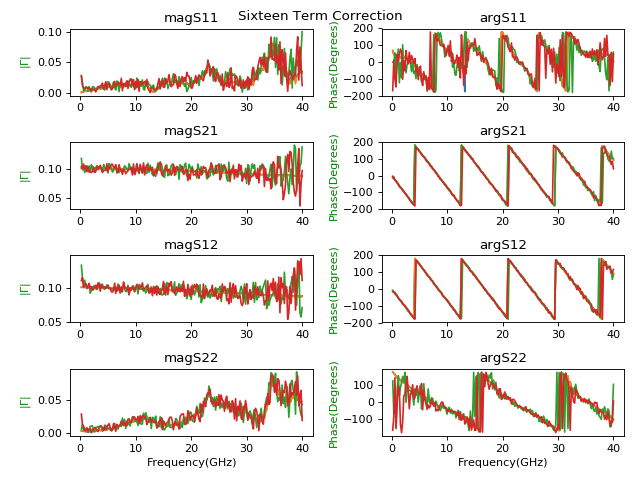

In [13]:
compare_s2p_plots(pyMeasure_sixteen_term_corrected_DUTS,labels=["DY202.txt","DY2022.txt",
                                        "DY202_measured with rnd.txt",
                                        "DY202_measured with rnd1.txt"],display_legend=False);
plt.suptitle("Sixteen Term Correction")

<IPython.core.display.Javascript object>


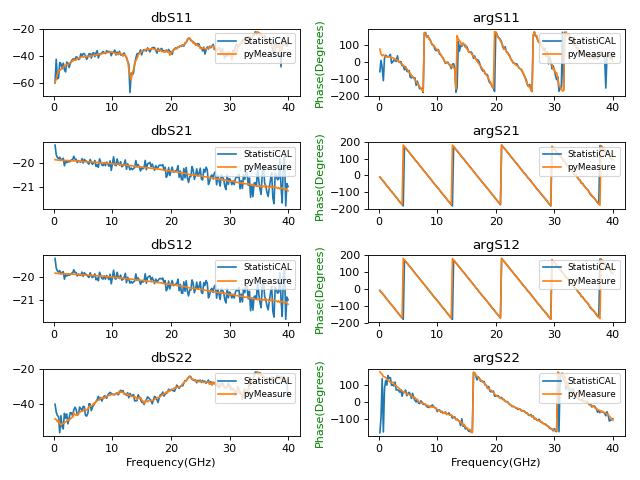

In [14]:
compare_s2p_plots([corrected_DUT,pyMeasure_corrected_DUTS[1]],labels=["StatistiCAL","pyMeasure"],
                  format="DB");

<IPython.core.display.Javascript object>


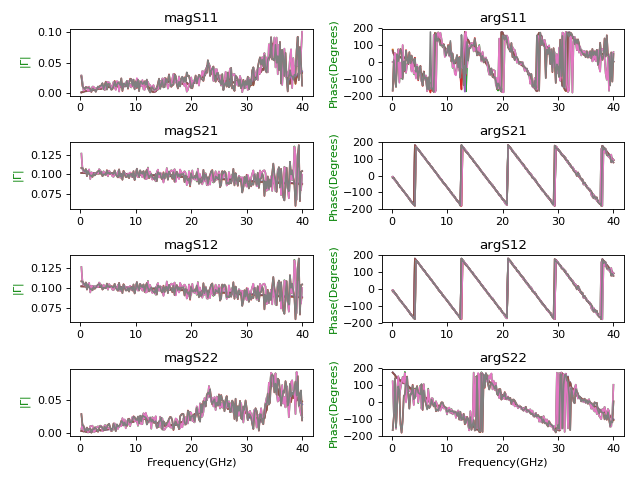

In [15]:
compare_s2p_plots(pyMeasure_corrected_DUTS+pyMeasure_eight_term_corrected_DUTS,display_legend=False);

<IPython.core.display.Javascript object>


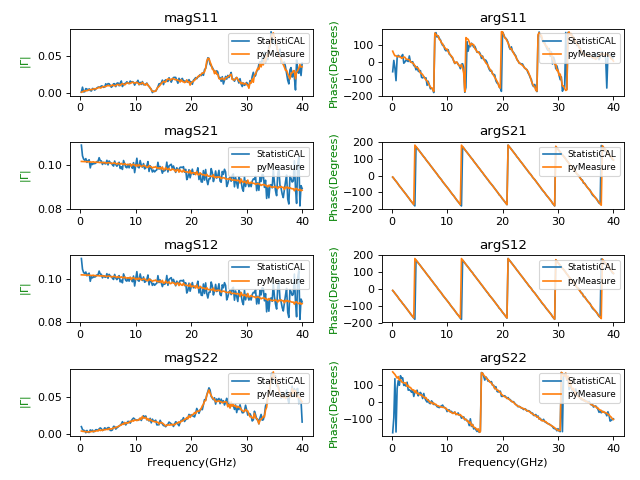

In [16]:
compare_s2p_plots([corrected_DUT,
                   pyMeasure_eight_term_corrected_DUTS[0]],labels=["StatistiCAL","pyMeasure"]);

<IPython.core.display.Javascript object>


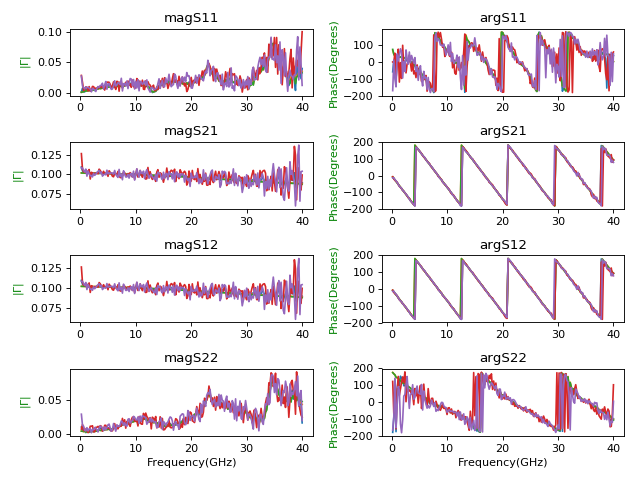

In [17]:
compare_s2p_plots([corrected_DUT]+pyMeasure_eight_term_corrected_DUTS_sw,display_legend=False);

<IPython.core.display.Javascript object>


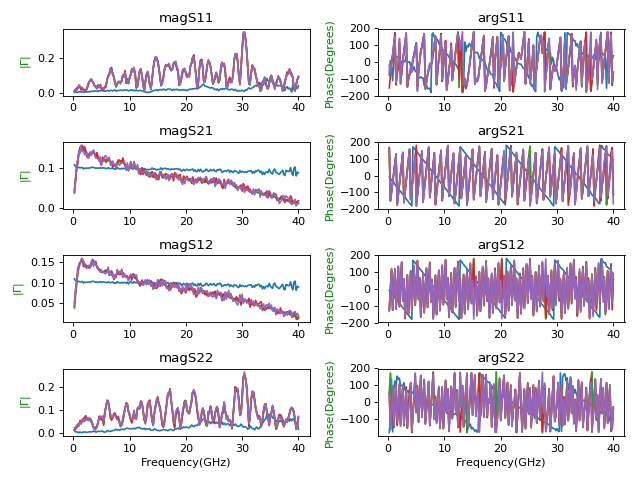

In [18]:
compare_s2p_plots([corrected_DUT]+uncorrected_DUTs,display_legend=False);

<IPython.core.display.Javascript object>


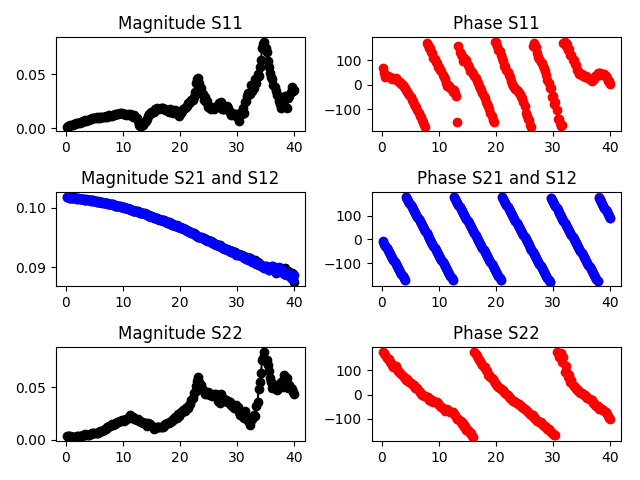

In [20]:
StatistiCAL_corrected_DUT=S2PV1(os.path.join(TEST_DIRECTORY,"TwelveTermCorrectedDUTStatistiCAL.txt"))
StatistiCAL_corrected_DUT.show();

<IPython.core.display.Javascript object>


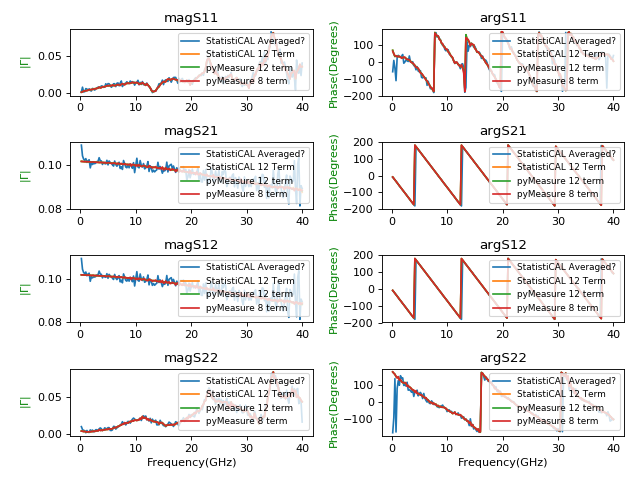

In [21]:
compare_s2p_plots([corrected_DUT,StatistiCAL_corrected_DUT,pyMeasure_corrected_DUTS[0],
                   pyMeasure_eight_term_corrected_DUTS[0]],
                  labels=["StatistiCAL Averaged?",
                          "StatistiCAL 12 Term","pyMeasure 12 term",
                          "pyMeasure 8 term"],format="MA",display_legend=True);

In [37]:
s_11=complex(1,1)
s_21=(1-s_11**2)**.5

In [38]:
np.matrix([[s_11,s_21],[s_21,s_11]])

matrix([[ 1.00000000+1.j        ,  1.27201965-0.78615138j],
        [ 1.27201965-0.78615138j,  1.00000000+1.j        ]])

In [35]:
real_list=np.linspace(-1,1,1000)
imaginary_list=np.linspace(-1,1,1000)
mat=np.matrix([re])